In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline



In [2]:
# Read data from csv file (AdSmartABdata - AdSmartABdata)
df = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')
df.head(10) # Print first 10 rows of dataframe

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
# Columns Description

# auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.

# experiment: which group the user belongs to - control or exposed.

# control: users who have been shown a dummy ad
# exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.
# date: the date in YYYY-MM-DD format

# hour: the hour of the day in HH format.

# device_make: the name of the type of device the user has e.g. Samsung

# platform_os: the id of the OS the user has.

# browser: the name of the browser the user uses to see the BIO questionnaire.

# yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.

# no: 1 if the user chooses the “No” radio button for the BIO questionnaire.

In [4]:
# info about the data and check for null values
print(df.shape)
print(df.info())

# Check for null values
print(df.isnull().sum())
# 0 null values

# check duplicates and count them for auction_id
print(df.duplicated(subset='auction_id').sum())
# 0 duplicates


(8077, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB
None
auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64
0


In [5]:
# describe the data
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [6]:
# creating dataframe for people only participated in the experiment (exposed)
df_exp = df[df['experiment'] == 'exposed']
# creating dataframe for people only participated in the experiment (control)
df_con = df[df['experiment'] == 'control']
# creating dataframe for exposed people who chose the "YES" or “No” radio button
df_exp_yes_no = df_exp[(df_exp['yes'] == 1) | (df_exp['no'] == 1)]
# creating dataframe for control people who chose the "YES" or “No” radio button
df_con_yes_no = df_con[(df_con['yes'] == 1) | (df_con['no'] == 1)]
# creating dataframe for exposed people who chose the “Yes” radio button
df_exp_yes = df_exp[df_exp['yes'] == 1]
# creating dataframe for exposed people who chose the “No” radio button
df_exp_no = df_exp[df_exp['no'] == 1]
# creating dataframe for control people who chose the “Yes” radio button
df_con_yes = df_con[df_con['yes'] == 1]
# creating dataframe for control people who chose the “No” radio button
df_con_no = df_con[df_con['no'] == 1]




Total Exposed:  657
Total Control:  586


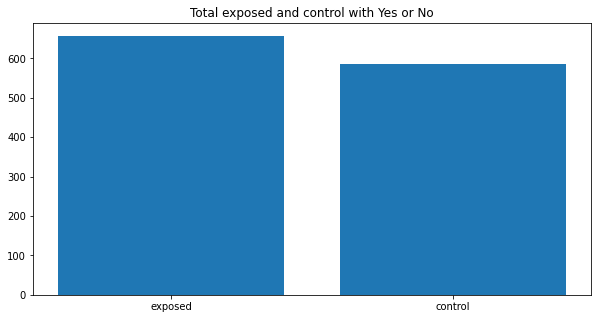

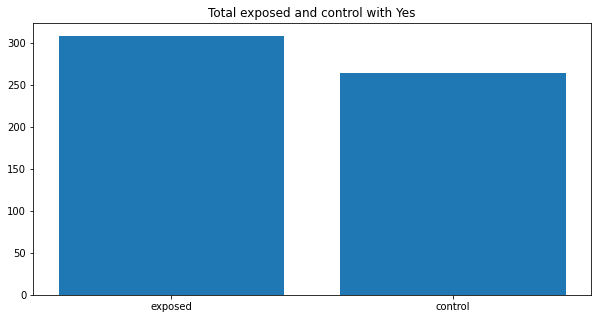

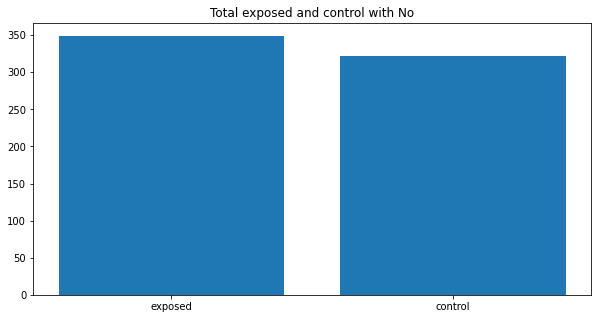

In [7]:
# total exposed yes + exposed no
print('Total Exposed: ', df_exp_yes_no.shape[0])
# total control yes + control no    
print('Total Control: ', df_con_yes_no.shape[0])
# graph for total exposed people and control people
plt.figure(figsize=(10,5))
plt.bar(['exposed', 'control'], [df_exp_yes_no.shape[0], df_con_yes_no.shape[0]])
plt.title('Total exposed and control with Yes or No')
plt.show()
# graph for total exposed people who chose the “Yes” radio button and control people who chose the “Yes” radio button
plt.figure(figsize=(10,5))
plt.bar(['exposed', 'control'], [df_exp_yes.shape[0], df_con_yes.shape[0]])
plt.title('Total exposed and control with Yes')
plt.show()
# graph for total exposed people who chose the “No” radio button and control people who chose the “No” radio button
plt.figure(figsize=(10,5))
plt.bar(['exposed', 'control'], [df_exp_no.shape[0], df_con_no.shape[0]])
plt.title('Total exposed and control with No')
plt.show()


In [8]:
# conversion rate for exposed
print('Conversion rate for exposed: {:.2%}' .format(df_exp_yes.shape[0] / df_exp_yes_no.shape[0]))
# conversion rate for control
print('Conversion rate for control: {:.2%}' .format(df_con_yes.shape[0] / df_con_yes_no.shape[0]))
# difference between conversion rate for exposed  and control
print('Difference between conversion rate for exposed and control: {:.2%}' .format((df_exp_yes.shape[0] / df_exp_yes_no.shape[0]) - (df_con_yes.shape[0] / df_con_yes_no.shape[0])))



Conversion rate for exposed: 46.88%
Conversion rate for control: 45.05%
Difference between conversion rate for exposed and control: 1.83%


In [9]:
# z-test for p value
count = np.array([df_exp_yes.shape[0], df_con_yes.shape[0]])
nobs = np.array([df_exp_yes_no.shape[0], df_con_yes_no.shape[0]])
stat, p_value = proportions_ztest(count, nobs, alternative='larger')
print('P-value: {0:.2f}%' .format(p_value*100))



P-value: 25.92%


In [10]:
# P value is higher than 0.05 (%5), so we fail to reject the null hypothesis

In [11]:
# Checking with another method for p value
# Using logistic regression to calculate P-value
# creating a dataframe at least yes or no == 1
df_yes_no = df[(df['yes'] == 1) | (df['no'] == 1)]
# Create dummy variables for experiment variable
df_yes_no[['control', 'exposed']] = pd.get_dummies(df_yes_no.loc[:, 'experiment'])
# add intercept
df_yes_no['intercept'] = 1
# Create a logistic regression model
model = sm.Logit(df_yes_no['yes'], df_yes_no[['intercept', 'exposed']])
# Fit the model
result = model.fit()
# Print the results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.689804
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    yes   No. Observations:                 1243
Model:                          Logit   Df Residuals:                     1241
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Jul 2022   Pseudo R-squ.:               0.0002431
Time:                        20:57:12   Log-Likelihood:                -857.43
converged:                       True   LL-Null:                       -857.64
Covariance Type:            nonrobust   LLR p-value:                    0.5185
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1986      0.083     -2.392      0.017      -0.361      -0.036
exposed        0.0736      0.

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_3127/1835931103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes_no[['control', 'exposed']] = pd.get_dummies(df_yes_no.loc[:, 'experiment'])
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_3127/1835931103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes_no[['control', 'exposed']] = pd.get_dummies(df_yes_no.loc[:, 'experiment'])
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_3127/1835931103.py:8: SettingWith

In [12]:
# According to Logistic Regression P value is approx. 26% (0.519/2), which is greater than α = 0.05 (5%).
# We fail to reject the null hypothesis
